### The IPython notebook gives a brief analysis of the lending club load dataset realeased around 2 months ago available here <a href="https://www.kaggle.com/wendykan/lending-club-loan-data">Here</a> 

### Description :
These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.

In [50]:
import pandas as pd
import numpy as np
from six.moves import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}


plt.rc('font', **font)
matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",101)
pd.set_option("display.max_colwidth",5000)

In [3]:
def load_and_clean(filename,attri_filename,skip=True, p_filename = "final_frame.pickle",p_original_filename = "original_frame.pickle"):
    if not skip:
        loanbook_df = pd.read_csv(filename)
        df = pd.read_excel(attri_filename)
        ### making a copy for future use
        l = loanbook_df.copy()
        ### getting count of Nan's in each columns 
        nulls = l.isnull().sum()
        ### Ommitting columns with more then 5 % missing values missing
        nulls =  nulls[nulls>l.shape[0]*0.05]
        print("Shape: ",nulls.shape)
        print(nulls)
        print("Earlier Shape ---> ",l.shape,"\n")
        l = l.drop(nulls.index,axis=1)
        print("After Dropping columns Shape ---> ",l.shape,"\n")
        l = l.dropna()
        print("After dropping all rows with Nan's  ---> ",l.shape,"\n")
        print("Pickling data in files")
        with open(p_filename,'wb') as f:
            pickle.dump(l,f,pickle.HIGHEST_PROTOCOL)
        print("File is pickled as final_frame.pickle")
        with open(p_original_filename,'wb') as f:
            pickle.dump(l,f,pickle.HIGHEST_PROTOCOL)
        print("File is pickled as original_frame.pickle")
    else:
        with open(p_filename, 'rb') as f:
            l = pickle.load(f)
        df = pd.read_excel(attri_filename)   
    return l,df
    
l , df= load_and_clean('loan.csv','LCDataDictionary.xlsx')

# Missing Values 

Attributes not present in actual data  and attributes removed due to missing values 

In [4]:
#these are values present in the excel file but not present in actual dataset
df[~df.LoanStatNew.isin(l.columns.values)]

,LoanStatNew,Description
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
7,desc,Loan description provided by the borrower
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"
12,emp_title,The job title supplied by the Borrower when applying for the loan.*
13,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
14,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
24,is_inc_v,"Indicates if income was verified by LC, not verified, or if the income source was verified"
27,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
28,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
34,mths_since_last_delinq,The number of months since the borrower's last delinquency.


In [5]:
# Viewing Sample rows 
l.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,Jan-2016,0,1,INDIVIDUAL,0
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2013,0,1,INDIVIDUAL,0
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,Jan-2016,0,1,INDIVIDUAL,0
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,Jan-2015,0,1,INDIVIDUAL,0
4,1075358,1311748,3000,3000,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.94,0,Jan-1996,0,15,0,27783,53.9,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Jan-2016,0,1,INDIVIDUAL,0
5,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075269,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,Sep-2015,0,1,INDIVIDUAL,0
6,1069639,1304742,7000,7000,7000,60 months,15.96,170.08,C,C5,8 years,RENT,47004,Not Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1069639,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-2005,1,7,0,17726,85.6,11,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,Jan-2016,170.08,Jan-2016,0,1,INDIVIDUAL,0
7,1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1,9 years,RENT,48000,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1072053,car,Car Downpayment,900xx,CA,5.35,0,Jan-2007,2,4,0,8221,87.5,4,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,Jan-2015,111.34,Dec-2014,0,1,INDIVIDUAL,0
8,1071795,1306957,5600,5600,5600,60 months,21.28,152.39,F,F2,4 years,OWN,40000,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1071795,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-2004,2,11,0,5210,32.6,13,f,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-2012,152.39,Aug-2012,0,1,INDIVIDUAL,0
9,1071570,1306721,5375,5375,5350,60 months,12.69,121.45,B,B5,< 1 year,RENT,15000,Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/brows

In [6]:
#ViewData
df[df.LoanStatNew.isin(l.columns.values)]

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
10,earliest_cr_line,The month the borrower's earliest reported credit line was opened
11,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
15,funded_amnt,The total amount committed to that loan at that point in time.


In [54]:
#Selecting parameters important for default prediction

important_attributes = ['annual_inc','collections_12_mths_ex_med','delinq_2yrs','dti','emp_length','funded_amnt',
                        'funded_amnt_inv','grade','home_ownership','id','initial_list_status','inq_last_6mths',
                        'installment','int_rate','last_pymnt_amnt','loan_amnt','open_acc','out_prncp','out_prncp_inv',
                        'pub_rec','purpose','recoveries','revol_bal','revol_util','term','total_acc','total_pymnt',
                        'total_pymnt_inv','total_rec_int','total_rec_late_fee','acc_now_delinq','loan_status']

In [55]:
mini_l = l[important_attributes]

In [56]:
mini_l.describe()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,out_prncp,out_prncp_inv,pub_rec,recoveries,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,acc_now_delinq
count,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000,869041.000000
mean,74957.923042,0.014186,0.313605,18.133464,14737.209723,14698.199104,31789708.002153,0.695523,436.711180,13.260417,2208.289201,14750.817251,11.542161,8277.210682,8273.852739,0.194372,46.152561,16915.112124,55.136933,25.267915,7712.059762,7674.463844,1790.626570,0.403615,0.004989
std,64430.260306,0.133461,0.860815,17.282781,8419.008945,8430.709821,22503709.174949,0.998992,243.921244,4.382092,4833.201719,8424.695154,5.304391,8431.052995,8427.653294,0.580457,408.847983,22406.649763,23.819303,11.830778,7876.646518,7851.531982,2101.497659,4.123181,0.077713
min,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,54734.000000,0.000000,15.670000,5.320000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45000.000000,0.000000,0.000000,11.900000,8000.000000,8000.000000,9005834.000000,0.000000,260.850000,9.990000,290.370000,8000.000000,8.000000,0.000000,0.000000,0.000000,0.000000,6458.000000,37.800000,17.000000,2047.640000,2031.900000,472.600000,0.000000,0.000000
50%,64700.000000,0.000000,0.000000,17.630000,13000.000000,13000.000000,33230610.000000,0.000000,382.550000,12.990000,471.300000,13000.000000,11.000000,6301.130000,6297.760000,0.000000,0.000000,11883.000000,56.000000,24.000000,5054.870000,5024.740000,1106.430000,0.000000,0.000000
75%,90000.000000,0.000000,0.000000,23.910000,20000.000000,20000.000000,53564931.000000,1.000000,572.220000,16.200000,846.670000,20000.000000,14.000000,13500.110000,13490.010000,0.000000,0.000000,20825.000000,73.600000,32.000000,10789.460000,10726.950000,2274.900000,0.000000,0.000000
max,9500000.000000,20.000000,39.000000,9999.000000,35000.000000,35000.000000,68616867.000000,33.000000,1445.460000,28.990000,36475.590000,35000.000000,90.000000,49372.860000,49372.860000,86.000000,33520.270000,2904836.000000,892.300000,169.000000,57777.579870,57777.580000,24205.620000,358.680000,14.000000


### Bivariate Analysis  
Now that we have our final set of attributes decided lets check a covariance heat map and some important attribute relationships 


### Heatmap For correlational matrix

In [57]:
### getting the correlational matrix 


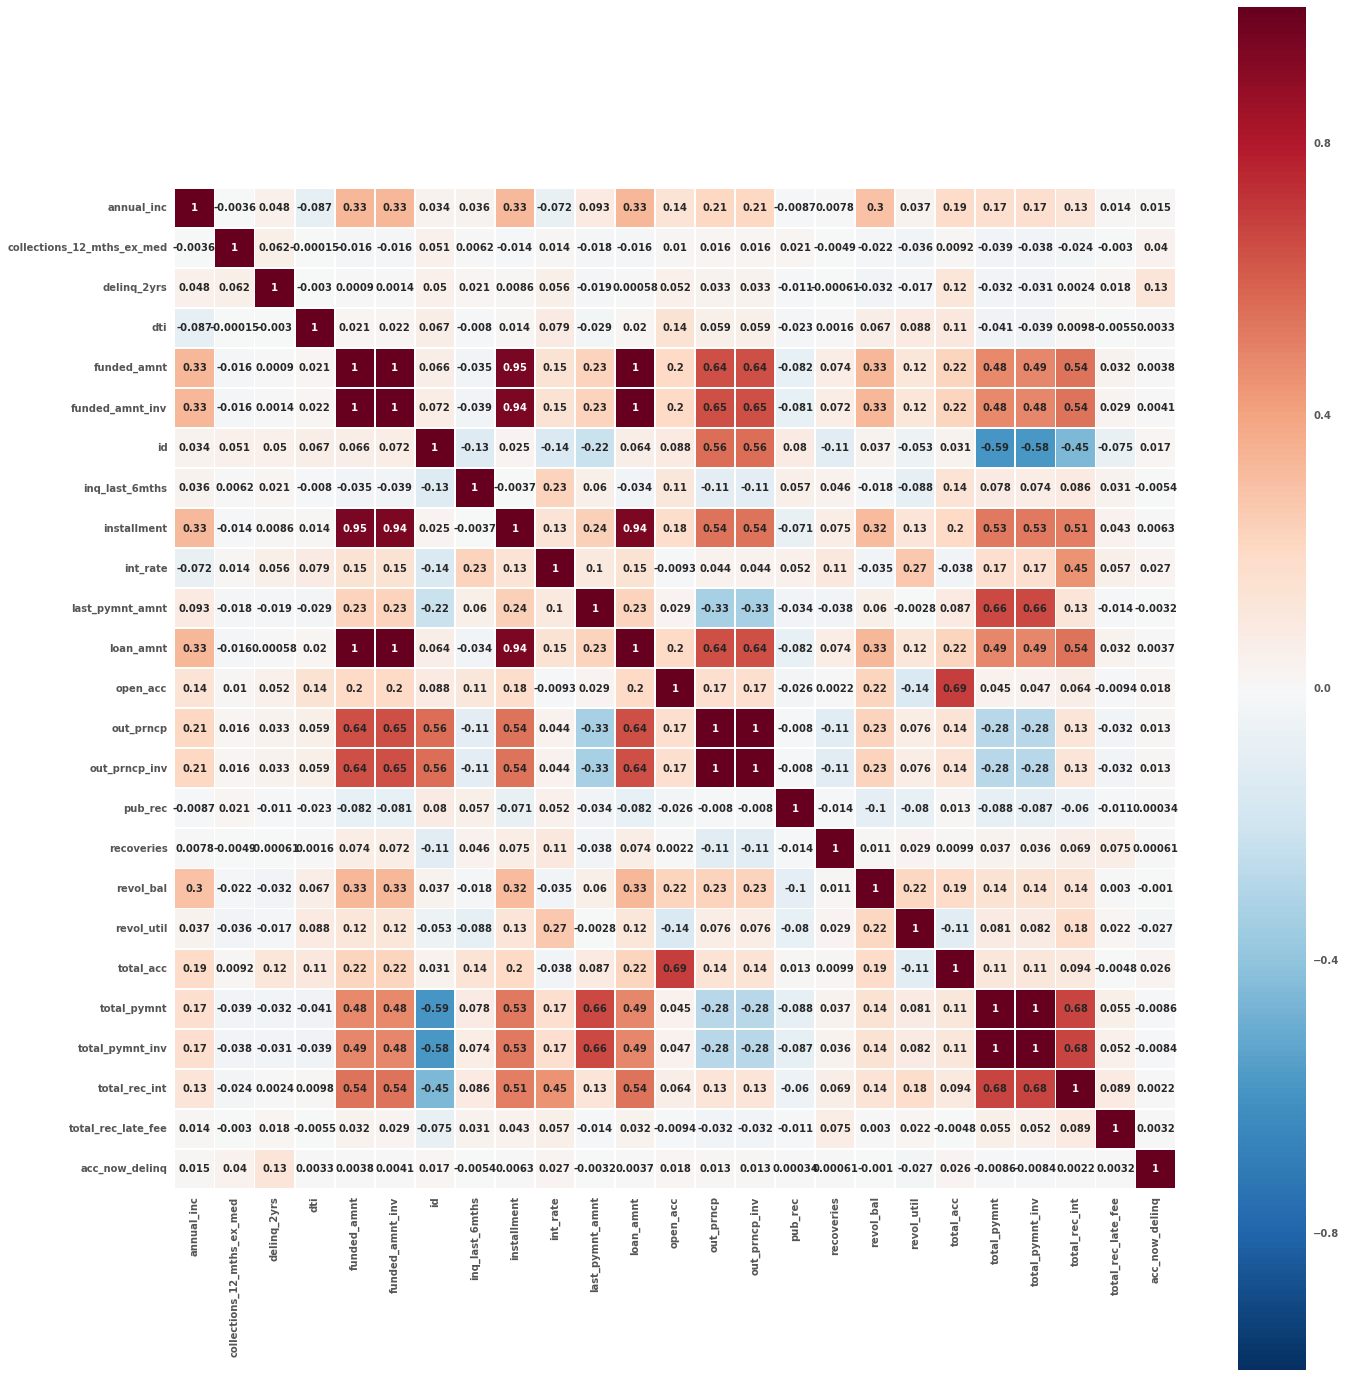

In [58]:
cormat = mini_l.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
#drawing heat map
sns.heatmap(cormat,annot=True,square=True,xticklabels=True ,yticklabels=True,linewidths=.9)
f.tight_layout()



As we can see from the heatmap there are some obvious relationships like <br>
1) Loan_amt  & installment -------->   More the loan more the installment and vice versa<br>
2) total_pyment abd last_pyment <br>

Using +0.66/-0.66 as a threshold we can extract some more relationships<br> 
1) out_pncp amount and funded_amt <br>
2) open_acc & total acc<br>


Also we make an important observation loan_amt and funded_amt and funded_amt_inv have corr 1 and values are almost same so these attributes are quite redundant we need to get rid of the extra attributes to avoid biased results


Now that we have looked at the numerical values we now take a look at nominal or categorical variables 

In [59]:
mini_obj = mini_l.select_dtypes(include=['object']) 
mini_obj.columns

Index(['emp_length', 'grade', 'home_ownership', 'initial_list_status',
       'purpose', 'term', 'loan_status'],
      dtype='object')

/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


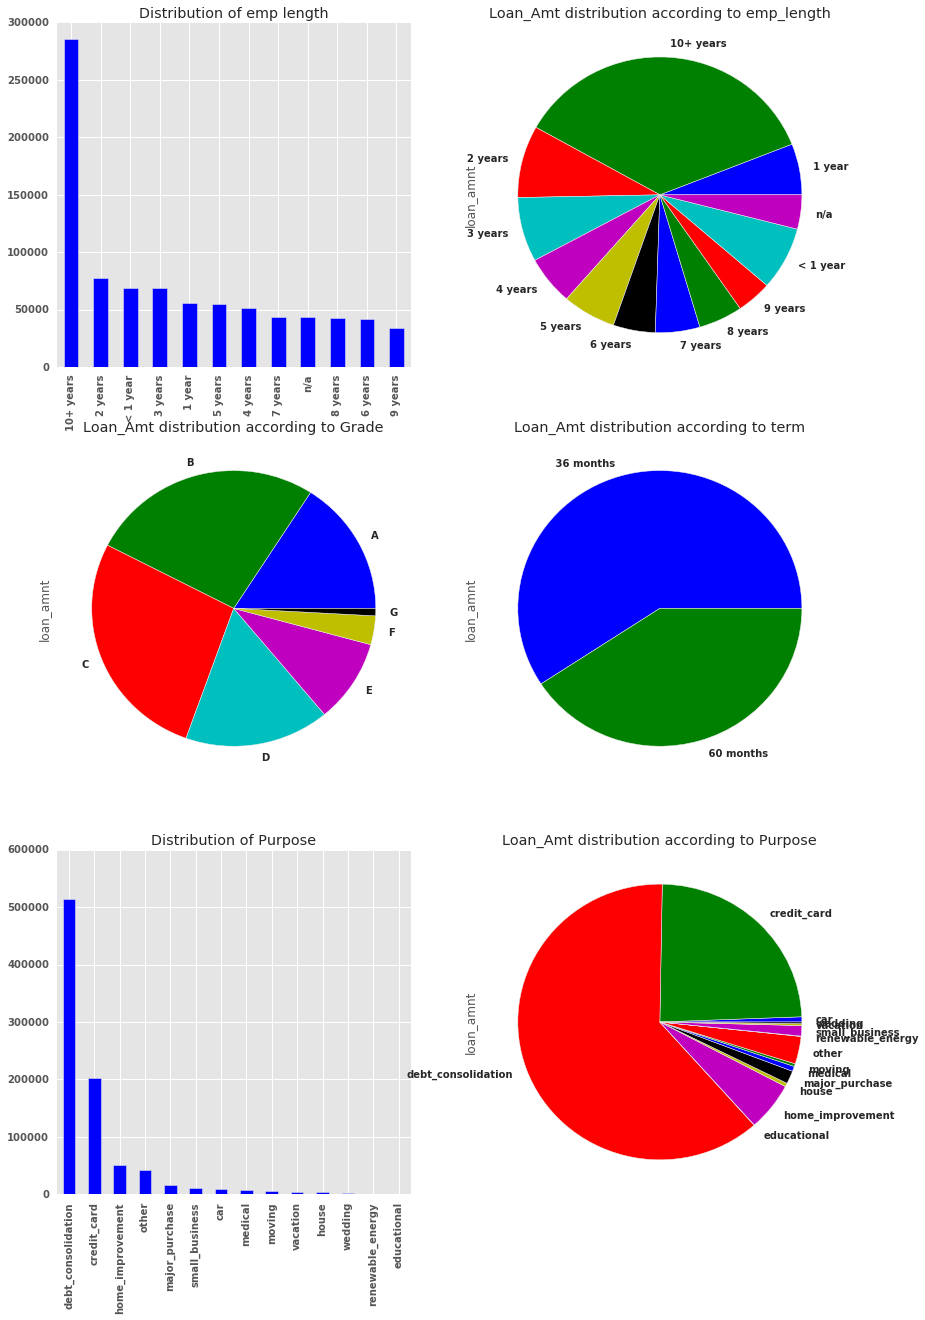

In [51]:
fig = plt.figure(figsize = (14,21))

plt.subplot2grid((3,2),(0,0))
mini_obj.emp_length.value_counts().plot(kind='bar')
plt.title("Distribution of emp length")

plt.subplot2grid((3,2),(0,1))
mini_l.groupby('emp_length').sum().loan_amnt.plot(kind='pie',fontsize=10)
plt.title("Loan_Amt distribution according to emp_length")

plt.subplot2grid((3,2),(1,0))
mini_l.groupby('grade').sum().loan_amnt.plot(kind='pie',fontsize=10)
plt.title("Loan_Amt distribution according to Grade")

plt.subplot2grid((3,2),(1,1))
mini_l.groupby('term').sum().loan_amnt.plot(kind='pie',fontsize=10)
plt.title("Loan_Amt distribution according to term")

plt.subplot2grid((3,2),(2,0))
mini_obj.purpose.value_counts().plot(kind='bar')
plt.title("Distribution of Purpose")

plt.subplot2grid((3,2),(2,1))
mini_l.groupby('purpose').sum().loan_amnt.plot(kind='pie',fontsize=10)
plt.title("Loan_Amt distribution according to Purpose")





## Loan Statuses and amounts 

/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


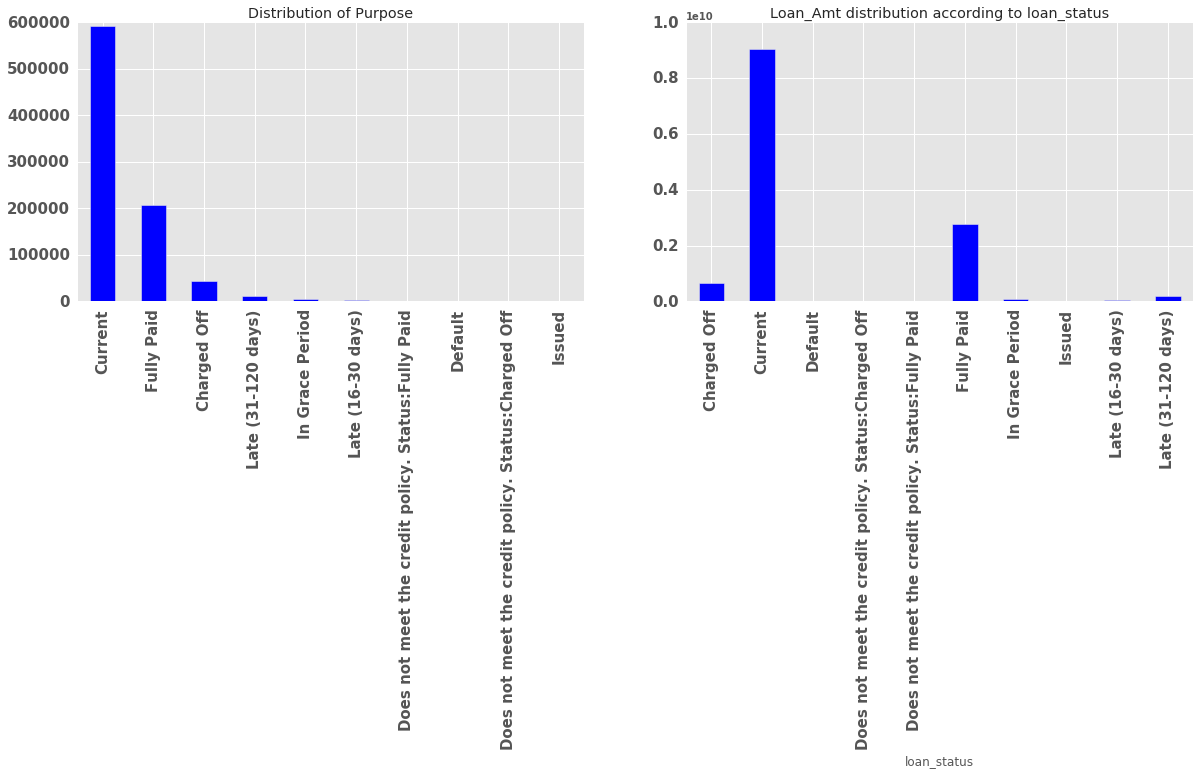

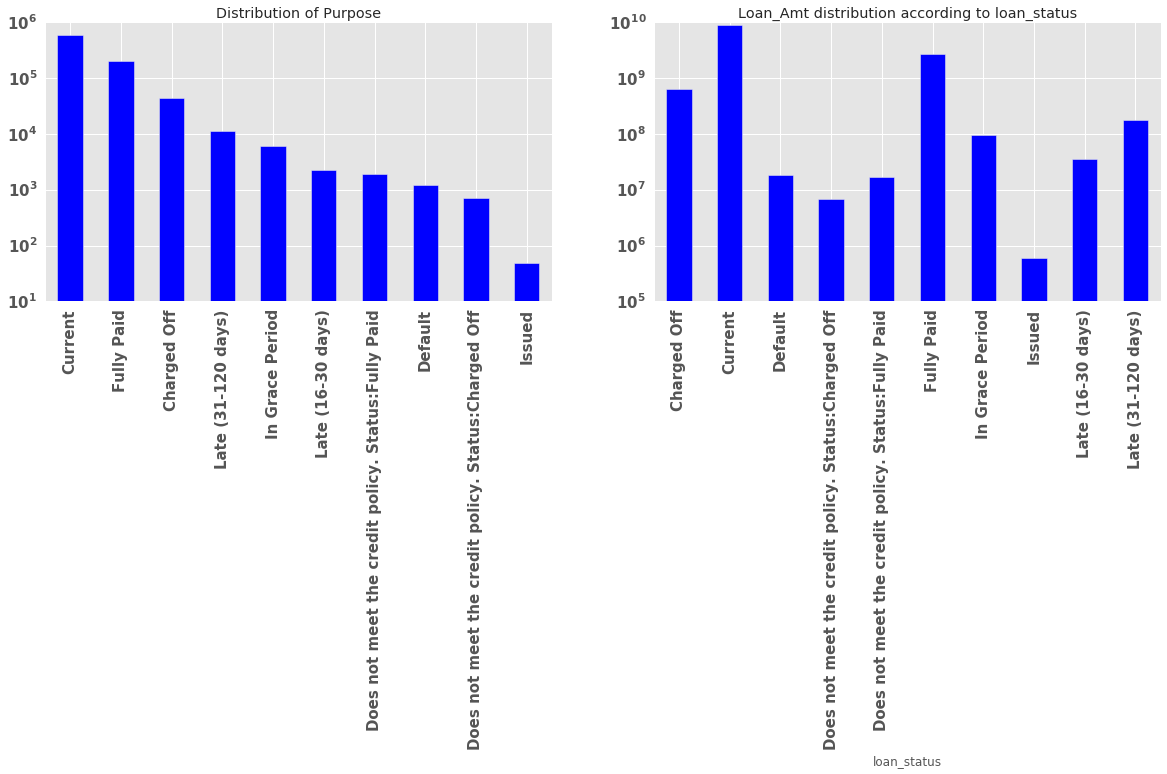

In [75]:
"""### Most Important plots of all Loan Statuses and amounts
fig = plt.figure(figsize = (20,5))
plt.subplot2grid((1,2),(0,0))

mini_obj.loan_status.value_counts().plot(kind='bar',fontsize=15)
plt.title("Distribution of Purpose")

plt.subplot2grid((1,2),(0,1))
mini_l.groupby('loan_status').sum().loan_amnt.plot(kind='bar',fontsize=15)
plt.title("Loan_Amt distribution according to loan_status")

"""
### Total loan_amt under each loan_status
### Using logy scaling for better interpretation
fig = plt.figure(figsize = (20,5))
plt.subplot2grid((1,2),(0,0))

mini_obj.loan_status.value_counts().plot(kind='bar',fontsize=15,logy=True)
plt.title("Distribution of Purpose")

plt.subplot2grid((1,2),(0,1))
mini_l.groupby('loan_status').sum().loan_amnt.plot(kind='bar',fontsize=15,logy=True)
plt.title("Loan_Amt distribution according to loan_status")



In [80]:
mini_l.head()

,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,id,initial_list_status,inq_last_6mths,installment,int_rate,last_pymnt_amnt,loan_amnt,open_acc,out_prncp,out_prncp_inv,pub_rec,purpose,recoveries,revol_bal,revol_util,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,acc_now_delinq,loan_status
0,24000,0,0,27.65,10+ years,5000,4975,B,RENT,1077501,f,1,162.87,10.65,171.62,5000,3,0.0,0.0,0,credit_card,0.00,13648,83.7,36 months,9,5861.071414,5831.78,861.07,0.00,0,Fully Paid
1,30000,0,0,1.00,< 1 year,2500,2500,C,RENT,1077430,f,5,59.83,15.27,119.66,2500,3,0.0,0.0,0,car,117.08,1687,9.4,60 months,4,1008.710000,1008.71,435.17,0.00,0,Charged Off
2,12252,0,0,8.72,10+ years,2400,2400,C,RENT,1077175,f,2,84.33,15.96,649.91,2400,2,0.0,0.0,0,small_business,0.00,2956,98.5,36 months,10,3003.653644,3003.65,603.65,0.00,0,Fully Paid
3,49200,0,0,20.00,10+ years,10000,10000,C,RENT,1076863,f,1,339.31,13.49,357.48,10000,10,0.0,0.0,0,other,0.00,5598,21.0,36 months,37,12226.302212,12226.30,2209.33,16.97,0,Fully Paid
4,80000,0,0,17.94,1 year,3000,3000,B,RENT,1075358,f,0,67.79,12.69,67.79,3000,15,766.9,766.9,0,other,0.00,27783,53.9,60 months,38,3242.170000,3242.17,1009.07,0.00,0,Current


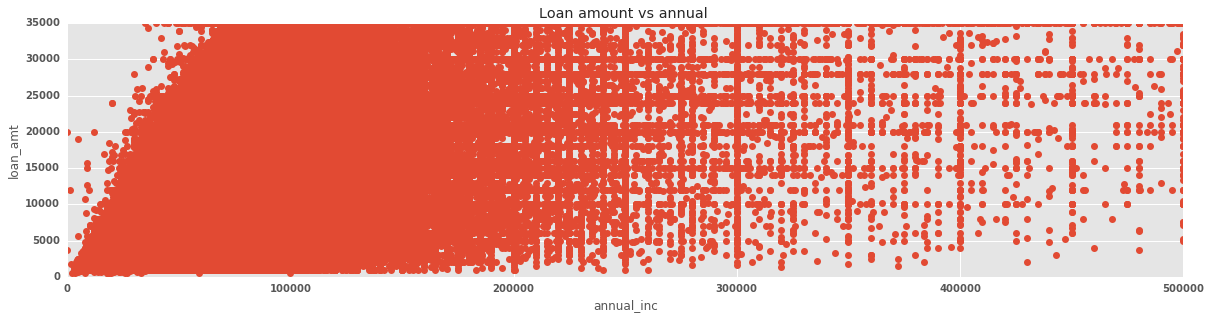

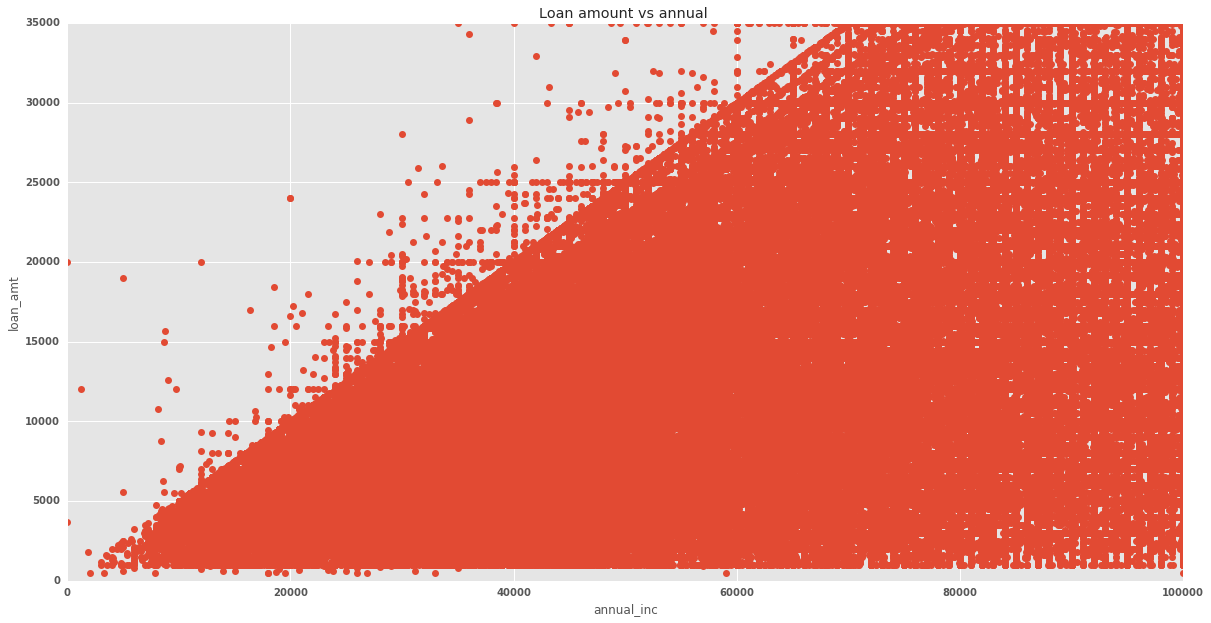

In [124]:
fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot2grid((2,1),(0,0))
plt.plot(mini_l.annual_inc,mini_l.loan_amnt,'o')
plt.title("Loan amount vs annual ")
ax1.set_xlim([0, 500000])
plt.xlabel('annual_inc')
plt.ylabel('loan_amt')

### So there is a threshold limit on the loan which follows y = 2x as shown in the graph loan 
### loan can only be half the annual_income 
###  zooming in 

fig = plt.figure(figsize = (20,10))
ax1 = plt.subplot2grid((1,1),(0,0))
plt.plot(mini_l.annual_inc,mini_l.loan_amnt,'o')
plt.title("Loan amount vs annual ")
ax1.set_xlim([0, 100000])
plt.xlabel('annual_inc')
plt.ylabel('loan_amt')





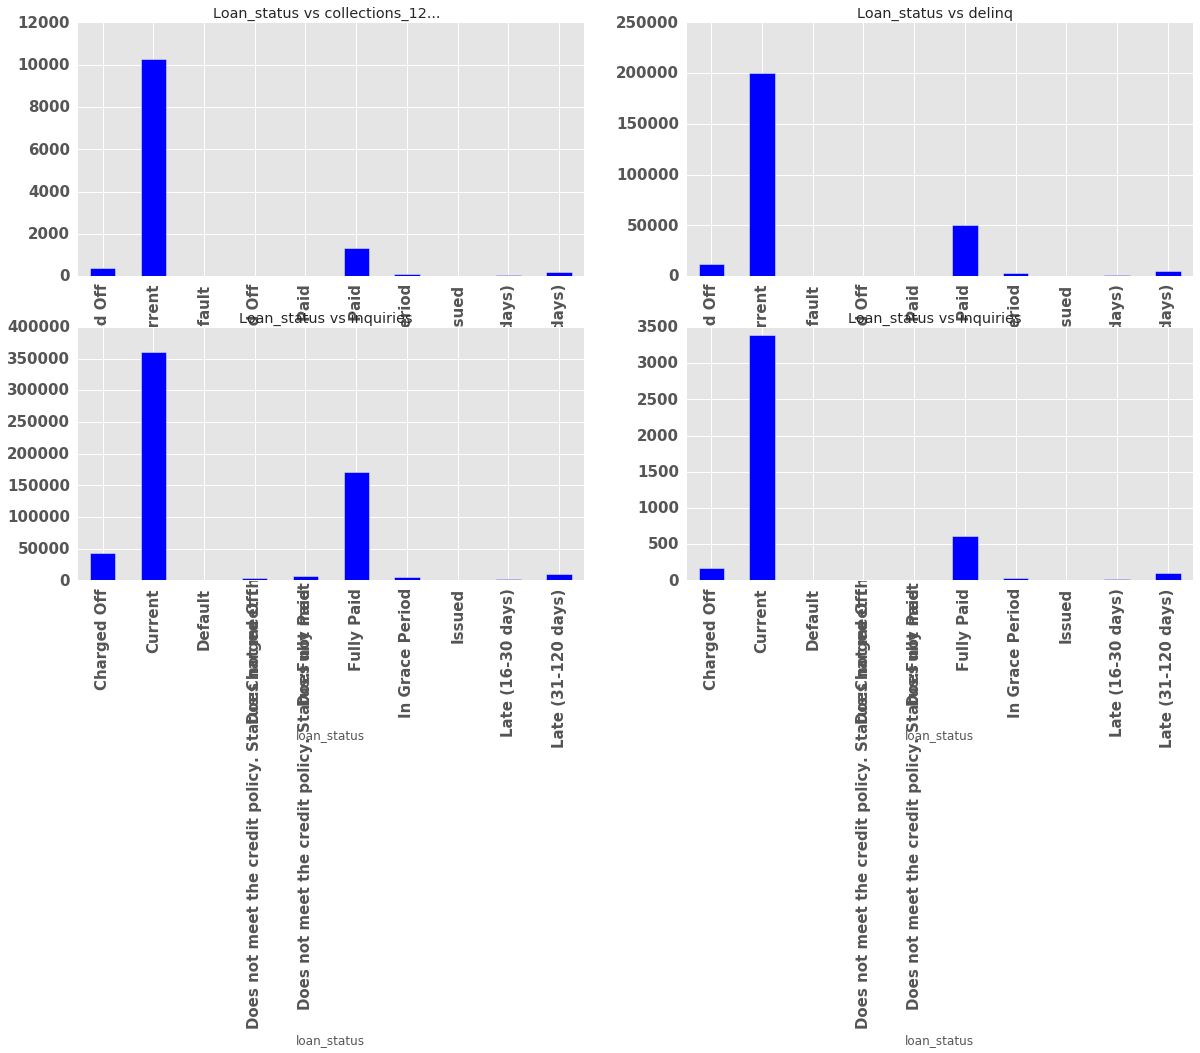

In [125]:
fig = plt.figure(figsize=(20,10))

df = mini_l.groupby('loan_status').sum()

plt.subplot2grid((2,2),(0,0))
df.collections_12_mths_ex_med.plot(kind='bar',fontsize=15)
plt.title("Loan_status vs collections_12...  ")

plt.subplot2grid((2,2),(0,1))
df.delinq_2yrs.plot(kind='bar',fontsize=15)
plt.title("Loan_status vs delinq  ")


plt.subplot2grid((2,2),(1,0))
df.inq_last_6mths.plot(kind='bar',fontsize=15)
plt.title("Loan_status vs inquiries  ")

plt.subplot2grid((2,2),(1,1))
df.acc_now_delinq.plot(kind='bar',fontsize=15)
plt.title("Loan_status vs inquiries  ")